In [1]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os
import json

Populating the interactive namespace from numpy and matplotlib


In [2]:
df=pd.read_csv('201502-citibike-tripdata.csv')
print df.columns


Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


In [4]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,ageM,ageF
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978,2,NaN,37
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993,1,22,NaN
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969,2,NaN,46
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985,2,NaN,30
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957,1,58,NaN


In [3]:
df.head()
df['ageM'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

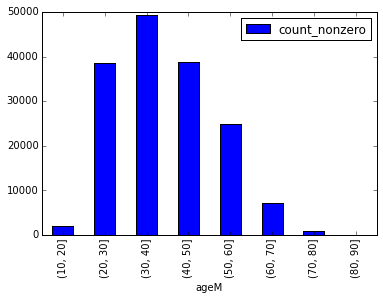

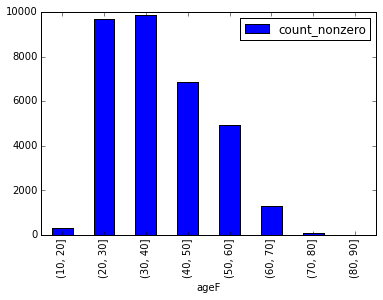

In [22]:
bins = np.arange(10, 99, 10)
df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar')
df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar')

In [23]:
#print df.ageS, df.ageS.cumsum()

          count_nonzero
ageM                   
(10, 20]       0.002160
(20, 30]       0.052312
(30, 40]       0.044676
(40, 50]       0.012573
(50, 60]       0.008436
(60, 70]       0.003543
(70, 80]       0.000207
(80, 90]       0.000000


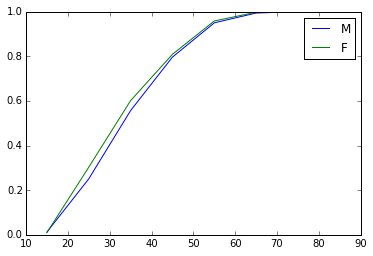

In [24]:
csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print np.abs(csM / csM.max()-csF / csF.max())

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.legend()

In [25]:
import scipy.stats

In [31]:
ks=scipy.stats.ks_2samp(df.ageM, df.ageF)
print ks

(0.65250088864063371, 0.0)


In [5]:
#The test gives ks,p (0.65250088864063371, 0.0).Ks statistics are not low,which means that they are highly correlated.

SyntaxError: invalid syntax (<ipython-input-5-90f774705d71>, line 1)

In [10]:
import scipy.stats
p=scipy.stats.pearsonr(df.ageM, df.ageF)
print p
#The results from Pearson correlation tells that my data groups(Age of Female and Age of Male) has exact linear relationship in February..

(nan, 1.0)


In [12]:
import scipy.stats
p=scipy.stats.spearmanr(df.ageM, df.ageF)
print p

(-0.413687473007469, 0.0)


In [ ]:
#The result says that age of Male and age of Female has negative correlation according to the data from February.


In [5]:
df['date']=pd.to_datetime(df['starttime'])
time= df['date']
print (df['date'].head())
print (time[0].hour)
       
df['ageD'] = 2015-df['birthyear'][(df['usertype'] == 'Subscriber') & (df['date'].dt.hour >6 & (df['date'].dt.hour <18)]
df['ageN'] = 2015-df['birthyear'][(df['usertype'] == 'Subscriber') & (df['date'].dt.hour <6 |(df['date'].dt.hour >18)]
                                                                      
                                                                      

SyntaxError: invalid syntax (<ipython-input-5-679c82861a54>, line 6)

In [6]:
bins = np.arange(10, 99, 10)
df.ageD.groupby(pd.cut(df.ageD, bins)).agg([count_nonzero]).plot(kind='bar')
df.ageN.groupby(pd.cut(df.ageN, bins)).agg([count_nonzero]).plot(kind='bar')

NameError: name 'np' is not defined